# **Exploratory Data Analysis**

Understanding the dataset to explore how the data is present in the database and if there is a need of creating some aggregated tables that can help with:

Vendor selection for profitability

Product Pricing Optimization

In [1]:
import pandas as pd
import sqlite3

In [2]:
#creating database connection
conn = sqlite3.connect('inventory.db')

In [3]:
#checking tables present in the database
tables = pd.read_sql_query("select * from sqlite_master where type='table'", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,begin_inventory,begin_inventory,2,"CREATE TABLE begin_inventory (\n\t""InventoryId..."
1,table,end_inventory,end_inventory,4656,"CREATE TABLE end_inventory (\n\t""InventoryId"" ..."
2,table,purchases,purchases,9717,"CREATE TABLE purchases (\n\t""InventoryId"" TEXT..."
3,table,purchase_prices,purchase_prices,50536,"CREATE TABLE purchase_prices (\n\t""Brand"" BIGI..."
4,table,sales,sales,50820,"CREATE TABLE sales (\n\t""InventoryId"" TEXT, \n..."
5,table,vendor_invoice,vendor_invoice,85109,"CREATE TABLE vendor_invoice (\n\t""VendorNumber..."
6,table,vendor_sales_summary,vendor_sales_summary,85241,"CREATE TABLE ""vendor_sales_summary"" (\n""Vendor..."


In [4]:
#checking tables present in the database
tables = pd.read_sql_query("select name from sqlite_master where type='table'", conn)
tables

,name
0,begin_inventory
1,end_inventory
2,purchases
3,purchase_prices
4,sales
5,vendor_invoice
6,vendor_sales_summary


In [5]:
for table in tables['name']:
    print('-'*50, f'{table}','-'*50)
    print('Count of records:', pd.read_sql(f"select count(*) as count from {table}", conn)['count'].values[0])
    display(pd.read_sql(f"select * from {table} limit 5", conn))

-------------------------------------------------- begin_inventory --------------------------------------------------
Count of records: 206529


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


-------------------------------------------------- end_inventory --------------------------------------------------
Count of records: 224489


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


-------------------------------------------------- purchases --------------------------------------------------
Count of records: 1037505


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,21-12-2023,02-01-2024,04-01-2024,16-02-2024,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,22-12-2023,01-01-2024,07-01-2024,21-02-2024,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,22-12-2023,02-01-2024,07-01-2024,21-02-2024,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,22-12-2023,01-01-2024,07-01-2024,21-02-2024,9.35,6,56.10,1
4,15_WANBORNE_1789,15,1789,Jack Daniels Tennesse Fire,750mL,1128,BROWN-FORMAN CORP,8150,23-12-2023,01-01-2024,09-01-2024,19-02-2024,17.16,11,188.76,1


-------------------------------------------------- purchase_prices --------------------------------------------------
Count of records: 12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


-------------------------------------------------- sales --------------------------------------------------
Count of records: 1037896


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,01-01-2024,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,02-01-2024,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,03-01-2024,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,08-01-2024,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,09-01-2024,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


-------------------------------------------------- vendor_invoice --------------------------------------------------
Count of records: 5543


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


-------------------------------------------------- vendor_sales_summary --------------------------------------------------
Count of records: 8503


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,59919,1574072.13,9478.0,341113.22,64242.15,17414.40,68601.68,-1232958.91,-361.451517,0.158180,5.692906
1,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,94753,1532156.01,20114.0,442347.86,42886.50,36957.99,257032.07,-1089808.15,-246.369034,0.212278,4.668431
2,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,61388,1423587.72,9203.0,275162.97,52289.50,16909.12,144929.24,-1148424.75,-417.361664,0.149915,4.482358
3,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,75029,1368528.96,10964.0,282398.36,46667.90,20144.60,123780.22,-1086130.60,-384.609387,0.146130,3.763856
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,57944,1268394.16,11883.0,357759.17,52774.51,21833.58,257032.07,-910634.99,-254.538546,0.205077,6.174223


In [6]:
purchases = pd.read_sql('select * from purchases where VendorNumber = 4466', conn)
purchases

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,22-12-2023,01-01-2024,07-01-2024,21-02-2024,9.35,4,37.40,1
1,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,22-12-2023,02-01-2024,07-01-2024,21-02-2024,9.41,5,47.05,1
2,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,22-12-2023,01-01-2024,07-01-2024,21-02-2024,9.35,6,56.10,1
3,50_MOUNTMEND_5255,50,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8307,03-01-2024,11-01-2024,18-01-2024,18-02-2024,9.35,6,56.10,1
4,69_MOUNTMEND_5255,69,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8307,03-01-2024,13-01-2024,18-01-2024,18-02-2024,9.35,5,46.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,10777,22-06-2024,28-06-2024,09-07-2024,15-08-2024,9.41,4,37.64,1
831,60_IRRAGIN_5215,60,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,10777,22-06-2024,30-06-2024,09-07-2024,15-08-2024,9.41,5,47.05,1
832,60_IRRAGIN_5255,60,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,10777,22-06-2024,30-06-2024,09-07-2024,15-08-2024,9.35,2,18.70,1
833,60_IRRAGIN_3140,60,3140,TGI Fridays Orange Dream,1.75L,4466,AMERICAN VINTAGE BEVERAGE,10777,22-06-2024,30-06-2024,09-07-2024,15-08-2024,11.19,6,67.14,1


In [7]:
purchase_price = pd.read_sql('select * from purchase_prices where VendorNumber = 4466', conn)
purchase_price

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [8]:
vendor_invoice = pd.read_sql('select * from vendor_invoice where VendorNumber = 4466', conn)
vendor_invoice

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-19,8207,2023-12-27,2024-02-26,335,3142.33,16.97,None
2,4466,AMERICAN VINTAGE BEVERAGE,2024-01-18,8307,2024-01-03,2024-02-18,41,383.35,1.99,None
3,4466,AMERICAN VINTAGE BEVERAGE,2024-01-27,8469,2024-01-14,2024-03-11,72,673.20,3.30,None
4,4466,AMERICAN VINTAGE BEVERAGE,2024-02-04,8532,2024-01-19,2024-03-15,79,740.21,3.48,None
5,4466,AMERICAN VINTAGE BEVERAGE,2024-02-09,8604,2024-01-24,2024-03-15,347,3261.37,17.61,None
6,4466,AMERICAN VINTAGE BEVERAGE,2024-02-17,8793,2024-02-05,2024-04-02,72,675.36,3.17,None
7,4466,AMERICAN VINTAGE BEVERAGE,2024-03-01,8892,2024-02-12,2024-03-28,117,1096.05,5.15,None
8,4466,AMERICAN VINTAGE BEVERAGE,2024-03-07,8995,2024-02-19,2024-04-02,129,1209.27,5.44,None
9,4466,AMERICAN VINTAGE BEVERAGE,2024-03-12,9033,2024-02-22,2024-04-16,147,1377.87,6.61,None


In [9]:
sales = pd.read_sql('select * from sales where VendorNo = 4466', conn)
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,09-01-2024,1750,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
1,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,12-01-2024,1750,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
2,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,15-01-2024,1750,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
3,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,21-01-2024,1750,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
4,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,23-01-2024,1750,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,15_WANBORNE_5215,15,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,23-02-2024,1750,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
426,15_WANBORNE_5255,15,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,03-02-2024,1750,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
427,15_WANBORNE_5255,15,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,23-02-2024,1750,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
428,15_WANBORNE_5255,15,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,24-02-2024,1750,1,1.84,4466,AMERICAN VINTAGE BEVERAGE


In [10]:
purchases.groupby(['Brand','PurchasePrice'])[['Quantity', 'Dollars']].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
3140,11.19,1552,17366.88
5215,9.41,2099,19751.59
5255,9.35,1968,18400.80


In [11]:
vendor_invoice['PONumber'].nunique()

55

In [12]:
sales.groupby('Brand')[['SalesDollars','SalesPrice','SalesQuantity']].sum()

,SalesDollars,SalesPrice,SalesQuantity
Brand,,,
5215,3884.01,2403.15,299
5255,4273.71,3182.55,329


# **Insights so far.....**

•	The **purchases table** contains actual purchase data, including the date of purchase, products (brands) purchased by vendors, the amount paid (in dollars), and the quantity purchased.

•	The **purchase price column** is derived from the purchase_prices table, which provides product-wise actual and purchase prices. The combination of vendor and brand is unique in this table.

•	The **vendor_invoice** table aggregates data from the purchases table, summarizing quantity and dollar amounts, along with an additional column for freight. This table maintains uniqueness based on vendor and PO number.

•	The **sales table** captures actual sales transactions, detailing the brands purchased by vendors, the quantity sold, the selling price, and the revenue earned.

•	As the data that we need for analysis is distributed in different tables, we need to create a summary table containing:

    o	purchase transactions made by vendors

    o	sales transaction data

    o	freight costs for each vendor

    o	actual product prices from vendors

In [13]:
vendor_invoice.columns

Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')

In [14]:
freight_summary = pd.read_sql_query("""select VendorNumber, VendorName,SUM(Freight) as FreightCost
FROM vendor_invoice
GROUP BY VendorNumber""", conn)

In [15]:
freight_summary

,VendorNumber,VendorName,FreightCost
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",27.08
1,54,AAPER ALCOHOL & CHEMICAL CO,0.48
2,60,ADAMBA IMPORTS INTL INC,367.52
3,105,ALTAMAR BRANDS LLC,62.39
4,200,AMERICAN SPIRITS EXCHANGE,6.19
...,...,...,...
121,98450,Serralles Usa LLC,856.02
122,99166,STARK BREWING COMPANY,130.09
123,172662,SWEETWATER FARM,178.34
124,173357,TAMWORTH DISTILLING,202.50


In [16]:
pd.read_sql_query("""SELECT 
p.VendorNumber,
p.VendorName,
p.Brand,
p.PurchasePrice,
pp.Volume,
pp.Price as ActualPrice,
SUM(p.Quantity) as TotalPurchaseQuantity,
SUM(p.Dollars) as TotalPurchaseDollars
FROM purchases as p
JOIN purchase_prices as pp
ON p.Brand = pp.Brand
WHERE p.PurchasePrice >0
GROUP BY p.VendorNumber, p.VendorName, P.Brand
ORDER BY TotalPurchaseDollars""", conn)

,VendorNumber,VendorName,Brand,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars
0,7245,PROXIMO SPIRITS INC.,3065,0.71,50,0.99,1,0.71
1,3960,DIAGEO NORTH AMERICA INC,3775,0.73,50,0.99,1,0.73
2,9815,WINE GROUP INC,22407,2.25,750,3.29,1,2.25
3,8004,SAZERAC CO INC,5683,0.39,50,0.49,6,2.34
4,9815,WINE GROUP INC,8527,1.32,750,4.99,2,2.64
...,...,...,...,...,...,...,...,...
8498,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750,29.99,57944,1268394.16
8499,17035,PERNOD RICARD USA,8068,18.24,1750,24.99,75029,1368528.96
8500,4425,MARTIGNETTI COMPANIES,3405,23.19,1750,28.99,61388,1423587.72
8501,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750,22.99,94753,1532156.01


In [17]:
sales.columns


Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [18]:
pd.read_sql_query("""SELECT
VendorNo,
Brand,
SUM(SalesDollars) as TotalSalesDollars,
SUM(SalesPrice) as TotalSalesPrice,
SUM(SalesQuantity) as TotalSalesQuantity,
SUM(ExciseTax) as TotalExciseTax
From sales
GROUP BY VendorNo, Brand
ORDER BY TotalSalesDollars""", conn)

,VendorNo,Brand,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax
0,8004,5287,0.98,0.98,2,0.10
1,3960,3303,0.99,0.99,1,0.05
2,9206,2773,0.99,0.99,1,0.05
3,9625,8872,0.99,0.99,1,0.05
4,3252,3933,1.98,0.99,2,0.10
...,...,...,...,...,...,...
7647,4425,3405,275162.97,52289.50,9203,16909.12
7648,17035,8068,282398.36,46667.90,10964,20144.60
7649,1128,1233,341113.22,64242.15,9478,17414.40
7650,3960,3545,357759.17,52774.51,11883,21833.58


In [19]:
vendor_sales_summary = pd.read_sql_query("""
WITH FreightSummary AS (
SELECT 
    VendorNumber,
    SUM(Freight) AS FreightCost
    FROM vendor_invoice
GROUP BY VendorNumber
),

PurchaseSummary AS (
SELECT 
    p.VendorNumber,
    p.VendorName,
    p.Brand,
    p.Description,
    p.PurchasePrice,
    pp.Volume,
    pp.Price as ActualPrice,
    SUM(p.Quantity) as TotalPurchaseQuantity,
    SUM(p.Dollars) as TotalPurchaseDollars
FROM purchases as p
JOIN purchase_prices as pp
    ON p.Brand = pp.Brand
WHERE p.PurchasePrice >0
GROUP BY p.VendorNumber, p.VendorName, p.Brand, P.Description, p.PurchasePrice, pp.Price, pp.Volume
),

SalesSummary AS (
SELECT
    VendorNo,
    Brand,
    SUM(SalesDollars) as TotalSalesDollars,
    SUM(SalesPrice) as TotalSalesPrice,
    SUM(SalesQuantity) as TotalSalesQuantity,
    SUM(ExciseTax) as TotalExciseTax
From sales
GROUP BY VendorNo, Brand
)

SELECT
    ps.VendorNumber,
    ps.VendorName,
    ps.Brand,
    ps.Description,
    ps.PurchasePrice,
    ps.ActualPrice,
    ps.Volume,
    ps.TotalPurchaseQuantity,
    ps.TotalPurchaseDollars,
    ss.TotalSalesQuantity,
    ss.TotalSalesDollars,
    ss.TotalSalesPrice,
    ss.TotalExciseTax,
    fs.FreightCost
FROM PurchaseSummary as ps
LEFT JOIN SalesSummary ss
    ON ps.VendorNumber = ss.VendorNo
    AND ps.Brand = ss.Brand
LEFT JOIN FreightSummary fs
    ON ps.VendorNumber = fs.VendorNumber
ORDER BY ps.TotalPurchaseDollars DESC
""", conn)

In [20]:
vendor_sales_summary


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,59919,1574072.13,9478.0,341113.22,64242.15,17414.40,68601.68
1,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,94753,1532156.01,20114.0,442347.86,42886.50,36957.99,257032.07
2,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,61388,1423587.72,9203.0,275162.97,52289.50,16909.12,144929.24
3,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,75029,1368528.96,10964.0,282398.36,46667.90,20144.60,123780.22
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,57944,1268394.16,11883.0,357759.17,52774.51,21833.58,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8498,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,3.0,5.97,5.97,0.33,27100.41
8499,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,128.0,62.72,0.98,6.72,50293.62
8500,9815,WINE GROUP INC,22407,Three Wishes Chard,2.25,3.29,750,1,2.25,1.0,3.29,3.29,0.11,27100.41
8501,3960,DIAGEO NORTH AMERICA INC,3775,Smirnoff Sorbet Pine/Coconut,0.73,0.99,50,1,0.73,NaN,NaN,NaN,NaN,257032.07


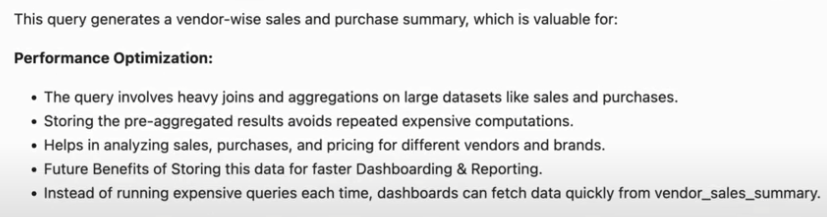

This query generates a vendor-wise sales and purchase summary, which is valuable for:

**Performance Optimization:**

•	The query involves heavy joins and aggregations on large datasets like sales and purchases.

•	Storing the pre-aggregated results avoids repeated expensive computations.

•	Helps in analyzing sales, purchases, and pricing for different vendors and brands.

•	Future benefits of storing this data for faster dashboarding & reporting.

•	Instead of running expensive queries each time, dashboards can fetch data quickly from vendor_sales_summary.

In [21]:
vendor_sales_summary.dtypes


VendorNumber               int64
VendorName                object
Brand                      int64
Description               object
PurchasePrice            float64
ActualPrice              float64
Volume                    object
TotalPurchaseQuantity      int64
TotalPurchaseDollars     float64
TotalSalesQuantity       float64
TotalSalesDollars        float64
TotalSalesPrice          float64
TotalExciseTax           float64
FreightCost              float64
dtype: object

In [22]:
vendor_sales_summary.isnull().sum()


VendorNumber                0
VendorName                  0
Brand                       0
Description                 0
PurchasePrice               0
ActualPrice                 0
Volume                      0
TotalPurchaseQuantity       0
TotalPurchaseDollars        0
TotalSalesQuantity       1636
TotalSalesDollars        1636
TotalSalesPrice          1636
TotalExciseTax           1636
FreightCost                 0
dtype: int64

In [23]:
#checking for white-spaces
vendor_sales_summary['VendorName'].unique()

array(['BROWN-FORMAN CORP          ', 'DIAGEO NORTH AMERICA INC   ',
       'MARTIGNETTI COMPANIES', 'PERNOD RICARD USA          ',
       'BACARDI USA INC            ', 'JIM BEAM BRANDS COMPANY    ',
       'ULTRA BEVERAGE COMPANY LLP ', 'PROXIMO SPIRITS INC.       ',
       'MAJESTIC FINE WINES        ', 'STOLI GROUP,(USA) LLC      ',
       'CAMPARI AMERICA            ', 'SAZERAC CO INC             ',
       'MOET HENNESSY USA INC      ', 'M S WALKER INC             ',
       'CONSTELLATION BRANDS INC   ', 'SAZERAC NORTH AMERICA INC. ',
       'REMY COINTREAU USA INC     ', 'SIDNEY FRANK IMPORTING CO  ',
       'WILLIAM GRANT & SONS INC   ', 'PALM BAY INTERNATIONAL INC ',
       'HEAVEN HILL DISTILLERIES   ', 'E & J GALLO WINERY         ',
       'CASTLE BRANDS CORP.        ', 'SOUTHERN WINE & SPIRITS NE ',
       'DISARONNO INTERNATIONAL LLC', 'EDRINGTON AMERICAS         ',
       'TRINCHERO FAMILY ESTATES   ', 'STE MICHELLE WINE ESTATES  ',
       'WINE GROUP INC             ', 'P

In [24]:
#DATA-CLEANING

#To change dtype of Voume column
vendor_sales_summary['Volume'] = vendor_sales_summary['Volume'].astype('float64')

#To replace Nan-Value
vendor_sales_summary.fillna(0, inplace = True)

#To strip  down white spaces
vendor_sales_summary['VendorName'] = vendor_sales_summary['VendorName'].str.strip()

In [25]:
vendor_sales_summary['GrossProfit'] = vendor_sales_summary['TotalSalesDollars'] - vendor_sales_summary['TotalPurchaseDollars']

In [26]:
vendor_sales_summary['GrossProfit'].min()


np.float64(-1232958.91)

In [27]:
vendor_sales_summary['ProfitMargin'] = vendor_sales_summary['GrossProfit'] / vendor_sales_summary['TotalSalesDollars']*100

In [28]:
vendor_sales_summary['StockTurnover'] = vendor_sales_summary['TotalSalesQuantity']/vendor_sales_summary['TotalPurchaseQuantity']

In [29]:
vendor_sales_summary['SalestoPurchaseRatio'] = vendor_sales_summary['TotalSalesDollars']/vendor_sales_summary['TotalPurchaseQuantity']

**#TO CREATE A TABLE & SAVE the made table vendor_sales_summary to the db**

In [30]:
cursor = conn.cursor()

In [31]:
vendor_sales_summary.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio'],
      dtype='object')

In [35]:
cursor.execute("DROP TABLE IF EXISTS vendor_sales_summary")
cursor.execute("""
CREATE TABLE vendor_sales_summary (
    VendorNumber INT,
    VendorName VARCHAR(100),
    Brand INT,
    Description VARCHAR(100),
    PurchasePrice DECIMAL(10,2),
    ActualPrice DECIMAL(10,2),
    Volume,
    TotalPurchaseQuantity INT,
    TotalPurchaseDollars DECIMAL(15,2),
    TotalSalesQuantity INT,
    TotalSalesDollars DECIMAL(15,2),
    TotalSalesPrice DECIMAL(15,2),
    TotalExciseTax DECIMAL(15,2),
    FreightCost DECIMAL(15,2),
    GrossProfit DECIMAL(15,2),
    ProfitMargin DECIMAL(15,2),
    StockTurnover DECIMAL(15,2),
    SalestoPurchaseRatio DECIMAL(15,2),
    PRIMARY KEY(VendorNumber, Brand)
)
""")


In [ ]:
pd.read_sql_query("select * from vendor_sales_summary", conn)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,59919,1574072.13,9478.0,341113.22,64242.15,17414.40,68601.68,-1232958.91,-361.451517,0.158180,5.692906
1,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,94753,1532156.01,20114.0,442347.86,42886.50,36957.99,257032.07,-1089808.15,-246.369034,0.212278,4.668431
2,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,61388,1423587.72,9203.0,275162.97,52289.50,16909.12,144929.24,-1148424.75,-417.361664,0.149915,4.482358
3,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,75029,1368528.96,10964.0,282398.36,46667.90,20144.60,123780.22,-1086130.60,-384.609387,0.146130,3.763856
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,57944,1268394.16,11883.0,357759.17,52774.51,21833.58,257032.07,-910634.99,-254.538546,0.205077,6.174223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8498,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,3.0,5.97,5.97,0.33,27100.41,3.33,55.778894,1.500000,2.985000
8499,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,128.0,62.72,0.98,6.72,50293.62,60.38,96.269133,21.333333,10.453333
8500,9815,WINE GROUP INC,22407,Three Wishes Chard,2.25,3.29,750.0,1,2.25,1.0,3.29,3.29,0.11,27100.41,1.04,31.610942,1.000000,3.290000
8501,3960,DIAGEO NORTH AMERICA INC,3775,Smirnoff Sorbet Pine/Coconut,0.73,0.99,50.0,1,0.73,0.0,0.00,0.00,0.00,257032.07,-0.73,-inf,0.000000,0.000000


In [ ]:
#Loading table(vendor_sales_summary) 
vendor_sales_summary.to_sql('vendor_sales_summary', conn , if_exists = 'replace', index = False)

8503

In [ ]:
import sqlite3
import pandas as pd
import logging
from ingestion_db import ingest_db

logging.basicConfig(
    filename='logs/get_vendor_summary.log',
    level = logging.DEBUG,
    format = "%(asctime)s - %(levelname)s - %(message)s",
    filemode = "a"
)

def create_vendor_summary(conn):
    '''this function will merge the different tables to get the overall vendor summary and adding new cols in the resultant data'''
    vendor_sales_summary = pd.read_sql_query("""
    WITH FreightSummary AS (
    SELECT 
        VendorNumber,
        SUM(Freight) AS FreightCost
        FROM vendor_invoice
    GROUP BY VendorNumber
    ),

    PurchaseSummary AS (
    SELECT 
        p.VendorNumber,
        p.VendorName,
        p.Brand,
        p.Description,
        p.PurchasePrice,
        pp.Volume,
        pp.Price as ActualPrice,
        SUM(p.Quantity) as TotalPurchaseQuantity,
        SUM(p.Dollars) as TotalPurchaseDollars
    FROM purchases as p
    JOIN purchase_prices as pp
        ON p.Brand = pp.Brand
    WHERE p.PurchasePrice >0
    GROUP BY p.VendorNumber, p.VendorName, p.Brand, P.Description, p.PurchasePrice, pp.Price, pp.Volume
    ),

    SalesSummary AS (
    SELECT
        VendorNo,
        Brand,
        SUM(SalesDollars) as TotalSalesDollars,
        SUM(SalesPrice) as TotalSalesPrice,
        SUM(SalesQuantity) as TotalSalesQuantity,
        SUM(ExciseTax) as TotalExciseTax
    From sales
    GROUP BY VendorNo, Brand
    )

    SELECT
        ps.VendorNumber,
        ps.VendorName,
        ps.Brand,
        ps.Description,
        ps.PurchasePrice,
        ps.ActualPrice,
        ps.Volume,
        ps.TotalPurchaseQuantity,
        ps.TotalPurchaseDollars,
        ss.TotalSalesQuantity,
        ss.TotalSalesDollars,
        ss.TotalSalesPrice,
        ss.TotalExciseTax,
        fs.FreightCost
    FROM PurchaseSummary as ps
    LEFT JOIN SalesSummary ss
        ON ps.VendorNumber = ss.VendorNo
        AND ps.Brand = ss.Brand
    LEFT JOIN FreightSummary fs
        ON ps.VendorNumber = fs.VendorNumber
    ORDER BY ps.TotalPurchaseDollars DESC
    """, conn)
    
    return vendor_sales_summary

def clean_data(df):
    '''this function will clean data'''
    #DATA-CLEANING

    #To change dtype of Voume column
    df['Volume'] = df['Volume'].astype('float64')

    #To replace Nan-Value
    df.fillna(0, inplace = True)

    #To strip  down white spaces
    df['VendorName'] = df['VendorName'].str.strip()
    df['Description'] = df['Description'].str.strip()



    #creating new columns
    df['GrossProfit'] = df['TotalSalesDollars'] - df['TotalPurchaseDollars']
    df['ProfitMargin'] = df['GrossProfit'] / df['TotalSalesDollars']*100
    df['StockTurnover'] = df['TotalSalesQuantity']/df['TotalPurchaseQuantity']
    df['SalestoPurchaseRatio'] = df['TotalSalesDollars']/df['TotalPurchaseQuantity']

    return df

if __name__ == '__main__':
    #creating database connection
    conn = sqlite3.connect('inventory.db')

    logging.info('Creating Vendor Summary Table.............')
    summary_df = create_vendor_summary(conn)
    logging.info(summary_df.head())

    logging.info('Cleaning Data.............')
    clean_df = clean_data(summary_df)
    logging.info(clean_df.head())

    logging.info('Ingesting Data.............')
    ingest_db(clean_df, 'vendor_sales_summary', conn)
    logging.info('Completed')
